In [1]:
import sys
sys.path.append('../fuzzy-tools') # or just install the module
sys.path.append('../astro-lightcurves-handler') # or just install the module

In [2]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import get_model_names

lcset_name = 'test'
rootdir = 'save'
method = 'spm-mcmc-estw'
cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
kf = '1'

model_names = get_model_names(rootdir, cfilename, kf, lcset_name)
model_names

['mdl=ParallelTimeModAttn~input_dims=1~dummy_seft=1~m=24~kernel_size=1~heads=4~time_noise_window=6*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=203~pb=.~bypass_synth=0~bypass_prob=0.0~ds_prob=0.1',
 'mdl=SerialTimeModAttn~input_dims=1~dummy_seft=1~m=24~kernel_size=1~heads=8~time_noise_window=6*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=202~pb=.~bypass_synth=0~bypass_prob=0.0~ds_prob=0.1']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
save/paper_v3/mdl=ParallelTimeModAttn~input_dims=1~dummy_seft=1~m=24~kernel_size=1~heads=4~time_noise_window=6*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=203~pb=.~bypass_synth=0~bypass_prob=0.0~ds_prob=0.1/fine-tuning/performance/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method=spm-mcmc-estw
['id=1000c0', 'id=1000c1', 'id=1001c0', 'id=1001c1', 'id=1002c0', 'id=1002c1', 'id=1003c0', 'id=1003c1', 'id=1004c0', 'id=1004c1', 'id=1005c0', 'id=1005c1'](12#); mdl=ParallelTimeModAttn~input_dims=1~dummy_seft=1~m=24~kernel_size=1~heads=4~time_noise_window=6*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=203~pb=.~bypass_synth=0~bypass_prob=0.0~ds_prob=0.1


,c,obj_y_pred_c,obj_y_pred_p
ZTF19abpbopt,SLSN,SNIbc,0.678920
ZTF19aapafqd,SNII*,SLSN,0.968720
ZTF20aamttiw,SNII*,SNIbc,0.479912
ZTF18abuicad,SNII*,SLSN,0.849781
ZTF19abgiwkt,SNII*,SLSN,0.781378
...,...,...,...
ZTF18aaisybp,SNIbc,SNIa,0.654606
ZTF18adasisj,SNIbc,SLSN,0.691105
ZTF19acxpqgh,SNIbc,SNII*,0.697493
ZTF19abqwtfu,SNIbc,SNIa,0.981413


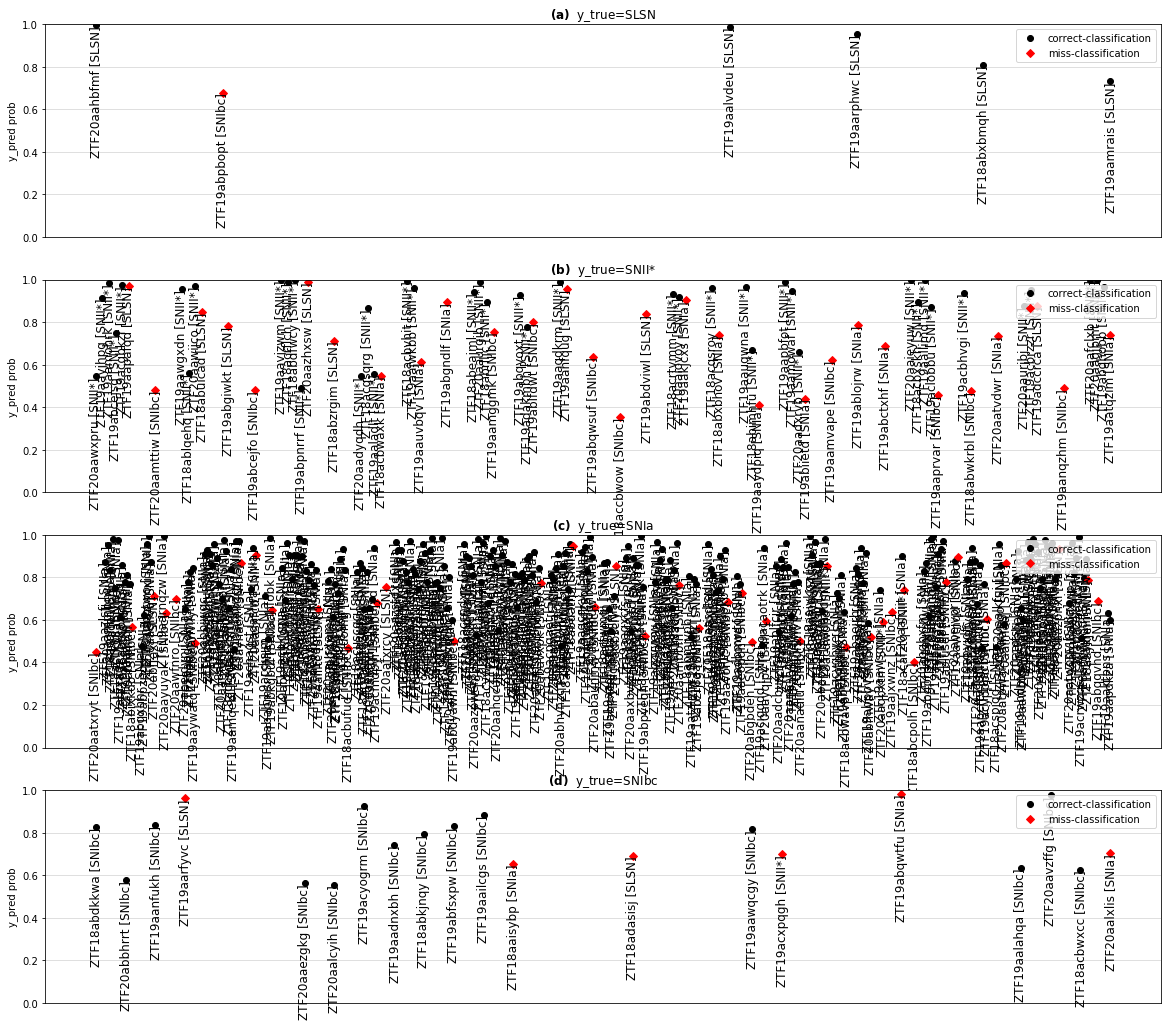

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import fuzzytools.files as ftfiles
from fuzzytools.datascience import misclassifications
import matplotlib.pyplot as plt

model_name = 'mdl=ParallelTimeModAttn~input_dims=1~dummy_seft=1~m=24~kernel_size=1~heads=4~time_noise_window=6*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=203~pb=.~bypass_synth=0~bypass_prob=0.0~ds_prob=0.1'
rootdir = 'save/paper_v3'
train_mode = 'fine-tuning'
load_roodir = f'{rootdir}/{model_name}/{train_mode}/performance/{cfilename}'
print(load_roodir)
files, files_ids, kfs = ftfiles.gather_files_by_kfold(load_roodir, kf, lcset_name,
    fext='d',
    imbalanced_kf_mode='ignore', # error oversampling
    )
print(f'{files_ids}({len(files_ids)}#); {model_name}')

file_idx = 0
file = files[file_idx]
thdays = file()['thdays']
thday = thdays[-1]
thdays_predictions = file()['thdays_predictions'][thday]
y_pred_p = thdays_predictions['y_pred_p']
y_true = thdays_predictions['y_true']
class_names = file()['class_names']
obj_ids = file()['lcobj_names']

fig, axs, miss_objs_df = misclassifications.plot_misclassification_map(y_pred_p, y_true, class_names,
    obj_ids=obj_ids,
    #pred_prob_th=.8, # None .5
    fontsize=12,
    figsize=(20,18),
    legend_loc='upper right',
    #verbose=1,
    also_show_correct_objs_txt=True,
    )
display(miss_objs_df)
plt.show()

In [4]:
txt = ''
for miss_obj_id in miss_objs_df.index:
    txt += f"'{miss_obj_id}', "
print(f'deep_miss_obj_ids = [{txt}]')

deep_miss_obj_ids = ['ZTF19abpbopt', 'ZTF19aapafqd', 'ZTF20aamttiw', 'ZTF18abuicad', 'ZTF19abgiwkt', 'ZTF19abcejfo', 'ZTF20aazhxsw', 'ZTF18abzrgim', 'ZTF18acbwaxk', 'ZTF19aauvbqv', 'ZTF19abgndlf', 'ZTF19aamggmk', 'ZTF19ablfdwt', 'ZTF19aanfqug', 'ZTF19abqwsuf', 'ZTF18accbwow', 'ZTF19abdviwl', 'ZTF19aakjcxs', 'ZTF18abxbhov', 'ZTF19aaydpiq', 'ZTF19abiietd', 'ZTF19aamvape', 'ZTF19ablojrw', 'ZTF19abctxhf', 'ZTF19aaprvar', 'ZTF18abwkrbl', 'ZTF20aatvdwr', 'ZTF19adccrca', 'ZTF19aanqzhm', 'ZTF19aatqzim', 'ZTF20aatxryt', 'ZTF18abixkdo', 'ZTF20abffaxl', 'ZTF20aayuyak', 'ZTF20aawfnro', 'ZTF19aaywatq', 'ZTF20aayhacx', 'ZTF20aasxfcd', 'ZTF19abkgbul', 'ZTF19aailltc', 'ZTF18acbufud', 'ZTF19acmdpyr', 'ZTF20aafxrcv', 'ZTF19abdyawn', 'ZTF20abavxpk', 'ZTF18abuatfp', 'ZTF20abaunmw', 'ZTF19adbsciy', 'ZTF19abpveqn', 'ZTF20aambbfn', 'ZTF19abzrjrg', 'ZTF19aavoiyc', 'ZTF19aaeopqn', 'ZTF20abgbdeh', 'ZTF20aayqjpv', 'ZTF20aanadlu', 'ZTF18acdwohd', 'ZTF18acbwavp', 'ZTF20abfhway', 'ZTF20aaqpxtm', 'ZTF19aajxwnz', 'ZT